# Meteors shower data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

to be added...

## Problem description

To generate (synthesise) a dataset to simulate meteors shower on a planet.

## Data categories and types

The following are envisaged data categories and types

* `Year` - Year of observation, integer from 1 to n
* `Entry`- No of atmosphere entry, integer following the Poisson distribution with lambda $lambda = 0.25$ (to be verified)
* `Impact` - No of surface impacts, binomial distribution as a function of size and angle of entry $f(size, angle)$
* Size of a meteor, exponential distribution (few large, many small)
* Density of a meteor, normal distribution
* Veleocity of a meteor hitting the surface, normal distribution ????
* Angle of entry, random ditribution in range 0-90
* Total crater area, calculated as a function of size, density, veleociy, angle and additional noise


## General assumptions

~~The scenario and data are both fictional, invented solely for the purpose of this project.~~ The data presented in the notebook is real and true. However, as it illustrates the situation in an undiscovered solar system in a galaxy far, far away, and is hard to prove it, please assume the data presented here is fictional.

The generate data is a simplified model with numerous assumptions and simplifications.
* ...
* ...

I have chosen not to define seeds for random methods. That means each time the Notebook and particular cells are run, results will (most likely) differ.

## Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Generating the data

In [2]:
# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact", "Size", "Velocity", "Crater"]) 
data

,Year,Entry,Impact,Size,Velocity,Crater


### Observation period and intervals

Observations are recorded in one year intervals over a period of 100 local years (for the planet in question). This will be assigned to variable `year`.

In [3]:
year = np.arange(1, 101) # temporarily only (for testing) - 100 years of observation 
year

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [4]:
# assigning year values to the data array, other columns with empty values (NaN - not a number)
data["Year"] = year
data.head()

,Year,Entry,Impact,Size,Velocity,Crater
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN


### Atmosphere entry

Number of significant (that means those being recorded) meteors' entries to the atmosphere of the planet, represented by variable `atm_entry`, in my model is considered unpredictable event and of a chaotic nature (significant random noise). It is assumed that in a given year there may be _none_ to _a very large number_ of entries, with a certain mean number. This will be represented by a **Poisson distribution**. The reason for choosing this distribution is to capture the fact of lesser probability of a larger number of meteors entering the planet's atmosphere.

The lambda value assigned randomly again, to strengthen the effect of the chaotic nature of the phenomenon. (More about randomness of the lambda values - why and how).

In [5]:
# defines lambda value for the poisson distribution
atm_entry_lambda = np.random.random() + np.random.randint(2, 4) # expected mean value - it gives a general shape of the distribution
print(atm_entry_lambda)

# defines noise used to modify the results
atm_entry_noise = np.random.randint(-1500, -500) # extra random noise - expands the range of possible results and adds randomness and increases the standard deviation
print(atm_entry_noise)

2.8256603250517185
-1408


atm_entry_lambda:	 2.8256603250517185
atm_entry_noise:	 -1408
min:	 0
mean:	 25.78
max:	 86
std div: 20.0327631643765


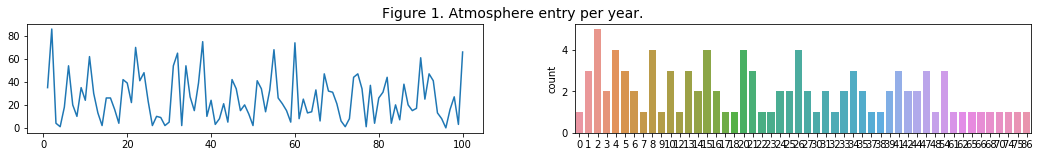

list in sequence of years:	 [35 86  4  1 18 54 20 10 35 24 62 30 13  2 26 26 16  4 42 39 22 70 41 48
 23  2 10  9  2  5 54 65  2 54 27 15 39 75 10 24  3  8 21  5 42 34 15 20
 12  2 41 34 14 33 68 26 21 15  5 74  8 25 13 14 33  6 47 32 31 21  6  1
  8 44 47 34  1 37  4 26 31 44  4 20  7 38 20 15 17 61 25 47 41 13  8  0
 16 27  3 66]
Frequency of unique values of the said array:
[[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 20 21 22 23 24 25
  26 27 30 31 32 33 34 35 37 38 39 41 42 44 47 48 54 61 62 65 66 68 70 74
  75 86]
 [ 1  3  5  2  4  3  2  1  4  1  3  1  3  2  4  2  1  1  4  3  1  1  2  2
   4  2  1  2  1  2  3  2  1  1  2  3  2  2  3  1  3  1  1  1  1  1  1  1
   1  1]]


In [6]:

# the algorithm with nested random variables - poisson distribution
# the intention is to have low mean and high std dev. values - verry erratic and chaotic phenomenon
# consulted reference: https://stackoverflow.com/a/35730154
atm_entry = abs(np.random.poisson(abs(atm_entry_lambda + (atm_entry_noise)), len(year)) + atm_entry_noise) # higher probability of occuring fewer meteors entry in a year; only non-negative values

# description of the generated data
print("atm_entry_lambda:\t", atm_entry_lambda)
print("atm_entry_noise:\t", atm_entry_noise)
print("min:\t", atm_entry.min())
print("mean:\t", atm_entry.mean())
print("max:\t", atm_entry.max())
print("std div:", atm_entry.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 1. Atmosphere entry per year.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.lineplot(x=year, y=atm_entry, ax=ax[0]) 

# right hand plot - how many the same number of entries occured
sns.countplot(x=atm_entry, ax=ax[1])   

plt.show()
print("list in sequence of years:\t", atm_entry)
#print("count:\t", np.unique(set(atm_entry)))

# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
unique_elements, counts_elements = np.unique(atm_entry, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


atm_entry_lambda 2.8256603250517185
atm_entry_noise -1408
min: 0
mean: 31.21
max: 136
std div: 23.22347734513503


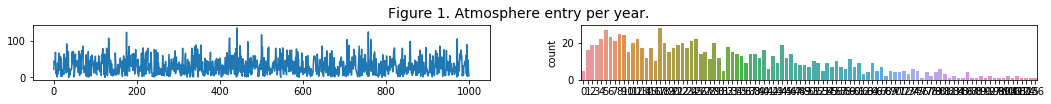

In [7]:
### test - to be deleted
# test for a larger number of the years - for better illustration of the distribution pattern
test_years_number = 1000

# test of the distribution generation algorithm for the above parameters - this sample is used only for illustration of the algorithm
atm_test = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), test_years_number) + atm_entry_noise) # only positive or 'zero' values

# description of the generated data
print("atm_entry_lambda", atm_entry_lambda)
print("atm_entry_noise", atm_entry_noise)
print("min:", atm_test.min())
print("mean:", atm_test.mean())
print("max:", atm_test.max())
print("std div:", atm_test.std())


x = np.arange(0, test_years_number)
y = atm_test

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 1))
plt.suptitle("Figure 1. Atmosphere entry per year.", y=1.14, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

sns.lineplot(x=x, y=y, ax=ax[0]) # number of entries in each year of observation
sns.countplot(x=atm_test, ax=ax[1]) # how many the same number of entries occured 

plt.show()

#print(sorted(atm_test))

##### Adding `Entry` values to the dataset.

In [8]:
data["Entry"] = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), len(year)) + atm_entry_noise)
data

,Year,Entry,Impact,Size,Velocity,Crater
0,1,7,NaN,NaN,NaN,NaN
1,2,20,NaN,NaN,NaN,NaN
2,3,42,NaN,NaN,NaN,NaN
3,4,73,NaN,NaN,NaN,NaN
4,5,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,96,26,NaN,NaN,NaN,NaN
96,97,21,NaN,NaN,NaN,NaN
97,98,31,NaN,NaN,NaN,NaN
98,99,13,NaN,NaN,NaN,NaN


### Surface impact

Number of meteors impacts into the planet surface, that is the meteors that entered the atmosphere of the planet and penetrated it without being completely burned out in the transit. 
The variable is represented in my model by variable `Impact` which is a result of **binomial distribution** with arbitrarily given probability of success.

### ~~Average size of the meteors~~ - this section will go

~~The average size of meteors entering into the atmosphere in given year. It is assumed in the model arbitrarily, according to pareto principle, that is where there is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.~~

In [9]:
# should it stay or shoud it go? - disabled for now

# defines lambda value for the poisson distribution
#size_lambda = np.random.random() #+ np.random.randint(100, 20000) # expected mean value - it gives a general shape of the distribution
# defines noise used to modify the results
#size_noise = np.random.random() * 100 # extra random noise - expands the range of possible results and adds randomness

#data["Size"] = np.around(np.random.pareto(size_lambda, len(year)) * size_noise / len(year), decimals=0)
#data

### Parameters of each meteor

#### Size of the meteors (and velocity?, and angle????? - to be yet decided)

The size of **every** meteors hitting the planet surface in given year is generated in the model. The size is stored in a separate subset of data for each year (3rd dimension of the original dataset?). Next, a mean of the sizes is passed to the original dataset.

The size of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

In [10]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution
pareto_a, pareto_m = 1.0, 1000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think
# shape of the pareto distribution determines the how much the number of small meteors would dominate over the large ones; greater the shape value, the more small samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the size of the metors); the larger the mode, the larger the scale of the meteors



# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    number_meteors = data.loc[i-1]["Entry"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    print("In year", i, "the number of meteors entering the atmosphere was:", number_meteors, "\nTheir mass was as follows:")
   

    # assgining the size for each meteor 
    s = ((np.random.pareto(pareto_a, number_meteors) + 1) * pareto_m) + np.random.randint(-1000, 1000)
    print(s, "\n")
    
       
    # visualisation of the results - plotting histogram for each year - disabled for sake of keeping the notebook tidy and compact
    #if number_meteors > 0:
    #    sns.distplot(s, kde=False)
    #    plt.show()
    
    # treshold mass to get through the atmosphere (smaller are considered to burn out completely during the transit)
    #treshold = 2000
    #if s > treshold:
    #    # create a sub dataset with number of meteors that would reach the planet surface
    #    data_impact[]
    

In year 1 the number of meteors entering the atmosphere was: 7 
Their mass was as follows:
[ 1816.72877787  4589.96646359  3323.24400811  3565.98013166
  1539.65428369 23421.86866052  1824.15352353] 

In year 2 the number of meteors entering the atmosphere was: 20 
Their mass was as follows:
[ 2613.61348692  2375.54972303  1656.94589053  1256.992101
  1220.9501096   9442.70612353  1843.68562619  1922.70831174
  4681.98691082  1643.40252609  1519.0435904   1232.10330143
  4053.83389396  1819.79459705  7064.41304975  1516.25419268
  5870.71456504  2099.12426966  1411.02862086 11537.31123612] 

In year 3 the number of meteors entering the atmosphere was: 42 
Their mass was as follows:
[  1412.69359907   1782.25604729 385362.40197096  21638.76863584
   1482.75927717   2235.12461272  18695.37228115   1393.7712924
   2279.73231079   3303.44696051   2895.72542613  10076.63664222
   1982.17233839   1768.38720181 152787.02916927   1710.49150274
   6005.92929981   2421.18512026   3448.41592593  

### testing assigning values to dataframe

#### Attempt 1 to create data subset for each year of observation

In [11]:
# from https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

# example for year 2

# List1  
mass_year_2 = [125, 30, 26, 22, 11]  # invented for testing
    
# List2  
veleo_year_2 = [425, 630, 126, 1132, 890] # invented for testing
    
# get the list of tuples from two listt and merge them by using zip().  
list_of_tuples = list(zip(mass_year_2, veleo_year_2))  
    
# Converting lists of tuples into Pandas Dataframe.  
data = pd.DataFrame(list_of_tuples, columns = ['Size', 'Veleocity'])  
     
# Print data.  
data # this is a subset of data for year 2, attempt 1

,Size,Veleocity
0,125,425
1,30,630
2,26,126
3,22,1132
4,11,890


#### Integrating the data subset to the primary dataset

In [12]:
# incorporating the subset to the main dataset (copy in this case)

mass_year_2
data_copy.at[1, "Size"] = mass_year_2

data_copy.at[1, "Veleocity"] = veleo_year_2 # list

# data_copy.at[0, "Meteor"] = (mass_year_2, veleo_year_2) # array of lists
# data_copy.at[0, "Meteor"] = data_test # it doesnt work as intended
data_copy

NameError: name 'data_copy' is not defined